In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [6]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Visualization 

In [13]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [14]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

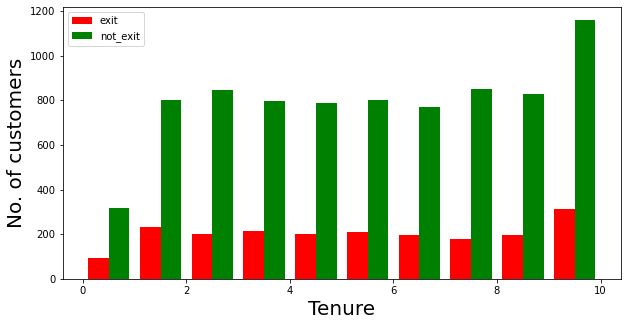

In [15]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

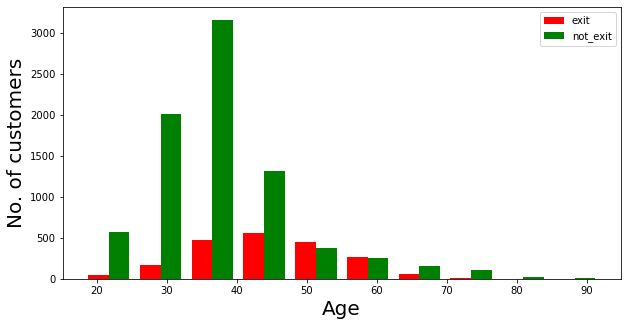

In [16]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

## Converting the Categorical Variables

In [17]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)
df = pd.concat([df,gender,states], axis = 1)

## Splitting the training and testing Dataset

In [18]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male'
,'Germany','Spain']]

In [19]:
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Normalizing the values with mean as 0 and Standard Deviation as 1

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.3180607 ,  1.90186369, -1.03874824, ..., -1.10267452,
        -0.5736112 ,  1.73535625],
       [-1.04317593,  0.95133242, -1.38412599, ...,  0.90688592,
        -0.5736112 ,  1.73535625],
       [ 0.81104731, -0.28435822,  1.03351824, ..., -1.10267452,
        -0.5736112 , -0.57625055],
       ...,
       [ 0.76961215, -0.47446447,  1.37889598, ...,  0.90688592,
        -0.5736112 , -0.57625055],
       [ 0.21023754,  0.76122617, -1.38412599, ...,  0.90688592,
        -0.5736112 , -0.57625055],
       [-0.55631285,  1.04638555, -0.002615  , ..., -1.10267452,
         1.74334114, -0.57625055]])

In [23]:
X_test

array([[-1.34358081e+00, -6.64570721e-01,  1.03351824e+00, ...,
         9.06885920e-01,  1.74334114e+00, -5.76250553e-01],
       [-2.65914702e+00, -4.74464469e-01, -2.61500293e-03, ...,
        -1.10267452e+00,  1.74334114e+00, -5.76250553e-01],
       [-2.04114018e-01,  1.90907414e-01, -6.93370495e-01, ...,
         9.06885920e-01,  1.74334114e+00, -5.76250553e-01],
       ...,
       [-6.70259525e-01, -2.84358217e-01, -1.38412599e+00, ...,
        -1.10267452e+00, -5.73611200e-01, -5.76250553e-01],
       [ 4.58848479e-01, -1.04478323e+00, -3.47992749e-01, ...,
         9.06885920e-01, -5.73611200e-01, -5.76250553e-01],
       [ 2.82749066e-01, -8.54676974e-01, -3.47992749e-01, ...,
        -1.10267452e+00,  1.74334114e+00, -5.76250553e-01]])

## Building the Classifier Model using Keras

In [24]:
import keras 

2023-08-18 11:14:36.601452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 11:14:36.633877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 11:14:36.634528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 11:14:37.247147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [26]:
classifier = Sequential()

In [27]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

In [28]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform")) #Adding second hidden layers
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 1s 926us/step - loss: 0.4841 - accuracy: 0.7989
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.7990
Epoch 3/50
700/700 [==============================] - 1s 993us/step - loss: 0.4166 - accuracy: 0.8017
Epoch 4/50
700/700 [==============================] - 1s 942us/step - loss: 0.4134 - accuracy: 0.8224
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4106 - accuracy: 0.8327
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4089 - accuracy: 0.8340
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4069 - accuracy: 0.8339
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4055 - accuracy: 0.8351
Epoch 9/50
700/700 [==============================] - 1s 844us/step - loss: 0.4045 - accuracy: 0.8354
Epoch 10/50
700/700 [==============================] - 1s 864us/step - loss: 0.4034 - accura

In [31]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 662us/step


In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[2274,   96],
       [ 421,  209]])

In [35]:
accuracy = accuracy_score(y_test,y_pred)

In [36]:
accuracy

0.8276666666666667

Text(69.0, 0.5, 'Truth')

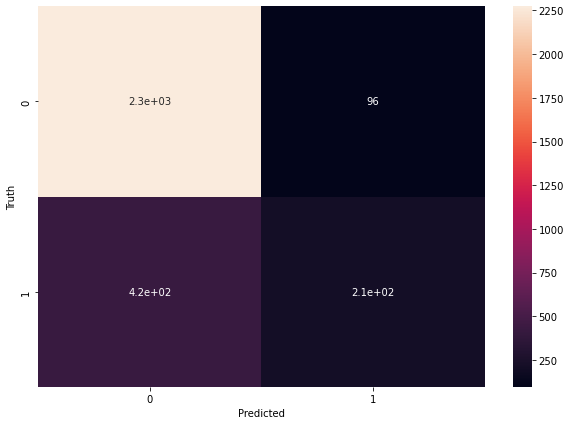

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2370
           1       0.69      0.33      0.45       630

    accuracy                           0.83      3000
   macro avg       0.76      0.65      0.67      3000
weighted avg       0.81      0.83      0.80      3000

